In [13]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

%matplotlib inline

In [15]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = yf.download(ticker, start='2007-01-01', end='2023-12-31')['Adj Close']
log_returns = np.log(1+data.pct_change())

[*********************100%%**********************]  1 of 1 completed


In [16]:
log_returns.tail()

,PG
Date,
2023-12-22,0.007046
2023-12-26,0.004533
2023-12-27,0.000822
2023-12-28,-0.002262
2023-12-29,0.005543


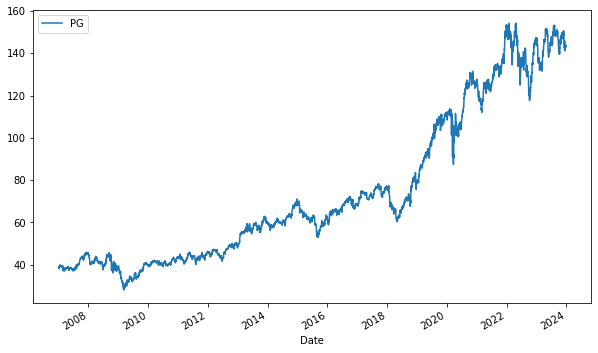

In [17]:
data.plot(figsize=(10,6));


<AxesSubplot:xlabel='Date'>

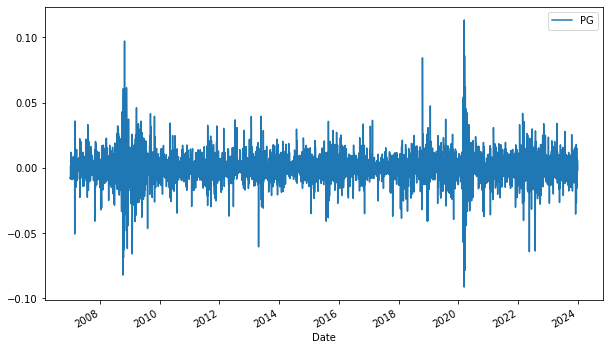

In [18]:
log_returns.plot(figsize = (10,6))

In [19]:
u = log_returns.mean()
u

PG    0.000306
dtype: float64

In [20]:
var = log_returns.var()
var

PG    0.000138
dtype: float64

drift = u - 1/2 * var

In [21]:
drift = u - (.5 * var)
drift

PG    0.000237
dtype: float64

In [22]:
stdev = log_returns.std()
stdev

PG    0.011728
dtype: float64

In [23]:
type(drift)

pandas.core.series.Series

In [24]:
np.array(drift)

array([0.00023729])

In [25]:
drift.values

array([0.00023729])

In [26]:
stdev.values

array([0.01172841])

In [27]:
norm.ppf(0.95)

1.6448536269514722

In [32]:
x = np.random.rand(10,2)
print(x)

[[0.5911969  0.46727774]
 [0.95685936 0.27663273]
 [0.00162236 0.35302907]
 [0.05880979 0.43786411]
 [0.67959051 0.52183242]
 [0.26450167 0.68935802]
 [0.49559473 0.75344657]
 [0.26840133 0.64927915]
 [0.75639025 0.38642204]
 [0.91150132 0.32121406]]


In [34]:
#Z corresponds to the distance between the mean and the events, expressed as the number of std deviations
Z=norm.ppf(np.random.rand(10,2))
Z

array([[-1.22252144, -0.02515643],
       [ 1.09852235,  2.58074755],
       [ 0.03878684, -0.00762959],
       [-1.30161782, -1.58010579],
       [ 0.95142136, -1.61343734],
       [ 0.15498894,  1.07092659],
       [-0.28507332,  0.31580631],
       [-0.1656472 ,  0.61961469],
       [ 0.24638284, -0.7448025 ],
       [-0.10383734,  0.49690199]])

In [35]:
t_intervals = 1000
iterations = 10

daily returns = e^r



r = drift + stdev * z
 

In [39]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals,iterations)))
daily_returns

array([[0.99592909, 1.00418613, 1.00618998, ..., 1.00501573, 0.98160608,
        1.02684815],
       [0.9923184 , 0.99677608, 1.00767992, ..., 0.99495132, 1.0028192 ,
        1.0124866 ],
       [0.99317439, 1.01161415, 0.9976974 , ..., 0.99894406, 0.99253847,
        0.99418251],
       ...,
       [0.9877654 , 1.0087532 , 1.00721997, ..., 0.9931065 , 0.99950209,
        1.01907188],
       [0.97152271, 0.98162309, 1.01025925, ..., 0.98875936, 0.98891681,
        1.0304798 ],
       [0.97554961, 1.01119416, 0.99369422, ..., 1.00261789, 1.00423891,
        1.04644752]])

$S_{t} = S_{0} * daily return_{t}$

$S_0$ this is the most recent price


$S_{t+1} = S_{t}* daily return_{t+1}$

...

$S_{t+999} = S_{t+998} * daily return_{t+999}$

In [40]:
S0 = data.iloc[-1]
S0

PG    143.821091
Name: 2023-12-29 00:00:00, dtype: float64

In [41]:
price_list = np.zeros_like(daily_returns)

In [42]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
price_list[0] = S0

In [44]:
price_list

array([[143.8210907, 143.8210907, 143.8210907, ..., 143.8210907,
        143.8210907, 143.8210907],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       ...,
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ]])

In [45]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [46]:
price_list

array([[143.8210907 , 143.8210907 , 143.8210907 , ..., 143.8210907 ,
        143.8210907 , 143.8210907 ],
       [142.71631532, 143.35742343, 144.92562498, ..., 143.09498416,
        144.22655167, 145.61692656],
       [141.74218981, 145.02239839, 144.59191923, ..., 142.94388478,
        143.15040047, 144.76980166],
       ...,
       [306.28661687, 113.93885053, 112.95231047, ..., 275.56561719,
        130.01254886, 123.65890295],
       [297.56440297, 111.84500693, 114.11111602, ..., 272.46808446,
        128.57159464, 127.42800099],
       [290.28883863, 113.09701785, 113.39155649, ..., 273.18137481,
        129.11659834, 133.34671584]])

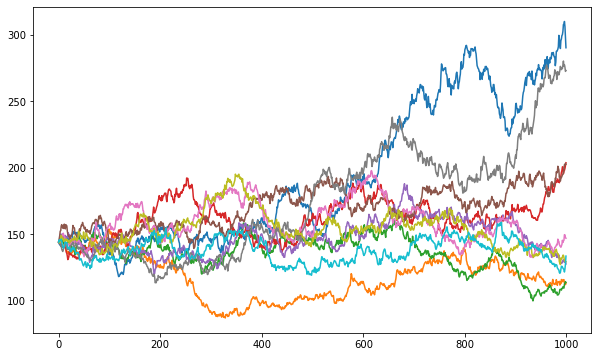

In [48]:
plt.figure(figsize=(10,6))
plt.plot(price_list)

These are simulated paths of expected stock price starting at the last stock price over 10 iterations